In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("laptop_details.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'laptop_details.csv'

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.tail()

In [ ]:
df.info()

In [4]:
df.to_csv('data/laptop_details.csv', index = False)

NameError: name 'df' is not defined

###### DATA CLEANING USING REGEX:

In [5]:
df = pd.read_csv("data/laptop_details.csv")

df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [6]:
print(df['Feature'][0])
print(df['Feature'][2])
print(df['Feature'][6])

Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR


In [7]:
import re

In [8]:
# temp = df['Feature'][100]

# regex = r'\d+\sGB[\s\w]+RAM'

# fun = lambda x : re.findall(regex, x)

# print(fun(temp))

In [9]:
# Processor Information

regex = r'^(?:AMD|Intel|M1)[\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [10]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor]


In [11]:
# temp1 = df['Feature'][100]

# regex = r'[8].\w*'

# fun1 = lambda x : re.findall(regex, x)

# print(fun1(temp1))

In [12]:
# temp1 = df['Feature'][100]

# regex = r'[8].\w*'

# fun1 = lambda x : re.findall(regex, x)

# print(fun1(temp1))

In [13]:
#RAM
regex = r'(\d+)\s*(?:GB|MB)(?:\s*DDR\d)?'


def extract_ram(text):
    match = re.search(regex, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)}GB"
    else:
        return None

df['RAM'] = df['Feature'].apply(extract_ram)


df['RAM'].value_counts()

8GB      400
16GB     263
4GB       38
32GB      17
128GB      2
Name: RAM, dtype: int64

In [14]:
df['RAM'] = df['RAM'].str.replace('8GB','8')
df['RAM'] = df['RAM'].str.replace('16GB','16')
df['RAM'] = df['RAM'].str.replace('4GB','4')
df['RAM'] = df['RAM'].str.replace('32GB','32')
df['RAM'] = df['RAM'].str.replace('128GB','32')
df['RAM'] = df['RAM'].str.replace('128GB','32')

In [15]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],8


In [16]:
temp2 = df['Feature'][100]

regex = r'(?:DDR\d+)'

fun2 = lambda x : re.findall(regex, x)

print(fun2(temp2))

['DDR4']


In [17]:
#RAM TYPE

regex = r'(?:DDR\d+)'

df['RAMType'] =  df['Feature'].apply(lambda x : re.findall(regex, x))
df['RAMType'].value_counts()

[DDR4]                597
[DDR5]                101
[]                     12
[DDR4, DDR4]            6
[DDR4, DDR6, DDR4]      2
[DDR4, DDR5, DDR4]      1
[DDR3]                  1
Name: RAMType, dtype: int64

In [18]:
#df.query('RAMType != ""')
#df1 = df.drop_duplicates()
#df[df['RAMType'].str.strip().astype(bool)]
#df['RAMType'].replace('', np.nan, inplace=True)

In [19]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,RAMType
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],8,[DDR4]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],8,[DDR4]


In [20]:
df['RAM'] = df['RAM'].astype('int32')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    int32  
 6   RAMType    720 non-null    object 
dtypes: float64(1), int32(1), object(5)
memory usage: 36.7+ KB


In [22]:
# OS 

regex = r'(Windows|MAC)'

def extract_os(text):
    match = re.search(regex, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return "Others"
    
df['OS'] = df['Feature'].apply(extract_os)
df['OS'].value_counts()

Windows    690
Mac         19
Others      11
Name: OS, dtype: int64

In [23]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,RAMType,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],8,[DDR4],Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],8,[DDR4],Windows


In [24]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [25]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,RAMType,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[256 GB SSD]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[512 GB SSD]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[512 GB SSD]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],8,[DDR4],Windows,[512 GB SSD]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],8,[DDR4],Windows,[512 GB SSD]


In [26]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))


In [27]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,RAMType,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],8,[DDR4],Windows,[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],8,[DDR4],Windows,[512 GB SSD],[ASUS]


In [28]:
regex = r'(\d+(?:\.\d+)?)(?:\s*inch|"|\'\')'

# Function to extract screen sizes from a string using regex

def extract_screen_size(text):
    match = re.search(regex, text)
    if match:
        return float(match.group(1))
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the screen sizes

df['ScreenSize'] = df['Feature'].apply(extract_screen_size)



In [29]:
df.ScreenSize.value_counts()

15.6        362
14.0        103
13.3          9
16.0          6
16.1          5
16.2          5
17.3          5
14.1          4
11.6          4
15.0          4
14.2          2
13.0          1
13.5          1
16.6          1
206015.6      1
Name: ScreenSize, dtype: int64

In [30]:
df['ScreenSize'] = df['ScreenSize'].astype('float64')
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [31]:
# regex = r'\(\d[0-9].\w+.\s\w{7}'
# df['ScreenResolution'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [32]:
# #screen resolution

# regex = r'\d+.\d+.cm.\(\d+.\d.\w{4}\)'
# df['ScreenSize'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [33]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,RAMType,OS,Storage,Brand,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[256 GB SSD],[Lenovo],14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[512 GB SSD],[Lenovo],15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],8,[DDR4],Windows,[512 GB SSD],[ASUS],15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],8,[DDR4],Windows,[512 GB SSD],[HP],15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],8,[DDR4],Windows,[512 GB SSD],[ASUS],15.6


In [34]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float64
 3   Feature     720 non-null    object 
 4   Processor   720 non-null    object 
 5   RAM         720 non-null    int32  
 6   RAMType     720 non-null    object 
 7   OS          720 non-null    object 
 8   Storage     720 non-null    object 
 9   Brand       720 non-null    object 
 10  ScreenSize  513 non-null    float64
dtypes: float64(3), int32(1), object(7)
memory usage: 59.2+ KB


In [35]:
df['ScreenSize'] = df['ScreenSize'].replace(16.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.3, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.1, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(16.2, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(17.3, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.1, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(11.6, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(15.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.2, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(13.0, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(206015.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.5, 14.0)

In [36]:
df['ScreenSize'].value_counts()

15.6    389
14.0    124
Name: ScreenSize, dtype: int64

In [37]:
df['ScreenSize'].sample(5)
#df['ScreenSize'].dropna()

667    15.6
355     NaN
374    15.6
434    14.0
213     NaN
Name: ScreenSize, dtype: float64

In [38]:
df['ScreenSize'].unique()

array([14. , 15.6,  nan])

In [39]:
df['ScreenSize'].mean()

15.213255360623888

In [40]:
df['ScreenSize'].fillna(15.6, inplace=True)

In [41]:
df['ScreenSize'].unique()

array([14. , 15.6])

In [42]:
df['ScreenSize'].value_counts()

15.6    596
14.0    124
Name: ScreenSize, dtype: int64

In [43]:
df.isnull().sum()

Product         0
Rating        139
MRP             0
Feature         0
Processor       0
RAM             0
RAMType         0
OS              0
Storage         0
Brand           0
ScreenSize      0
dtype: int64

In [44]:
df = df.drop(df.columns[1], axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   MRP         720 non-null    float64
 2   Feature     720 non-null    object 
 3   Processor   720 non-null    object 
 4   RAM         720 non-null    int32  
 5   RAMType     720 non-null    object 
 6   OS          720 non-null    object 
 7   Storage     720 non-null    object 
 8   Brand       720 non-null    object 
 9   ScreenSize  720 non-null    float64
dtypes: float64(2), int32(1), object(7)
memory usage: 53.6+ KB


In [46]:
print(df['Processor'][0]) 

print(type(df['Processor'][0]))

['Intel Core i3 Processor']
<class 'list'>


In [47]:
print(''.join(df['Processor'][0]))
print(type(''.join(df['Processor'][0])))

Intel Core i3 Processor
<class 'str'>


In [48]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
#df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.RAMType = df.RAMType.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))
#df.ScreenSize = df.ScreenSize.apply(lambda x : ''.join(x))

In [49]:
df.head()

,Product,MRP,Feature,Processor,RAM,RAMType,OS,Storage,Brand,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,256 GB SSD,Lenovo,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,Lenovo,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,ASUS,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,DDR4,Windows,512 GB SSD,HP,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,DDR4,Windows,512 GB SSD,ASUS,15.6


In [50]:
x = df[df['RAMType'] == ""].index
df = df.drop(x,axis = 0)

In [51]:
df['RAMType'].value_counts()

DDR4            597
DDR5            101
DDR4DDR4          6
DDR4DDR6DDR4      2
DDR4DDR5DDR4      1
DDR3              1
Name: RAMType, dtype: int64

In [52]:
x = df[df['Storage'] == ""].index
df = df.drop(x,axis = 0)

In [53]:
df['Storage'].value_counts()

512 GB SSD                      368
1 TB SSD                        172
256 GB SSD                       97
1 TB HDD256 GB SSD               26
1 TB HDD                         17
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [54]:
x = df[df['ProcessorName'] == ""].index
df = df.drop(x,axis = 0)

KeyError: 'ProcessorName'

In [ ]:
df['ProcessorName'].value_counts()

In [ ]:
print(df["Feature"][0])

In [55]:
df.head()

,Product,MRP,Feature,Processor,RAM,RAMType,OS,Storage,Brand,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,256 GB SSD,Lenovo,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,Lenovo,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,ASUS,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,DDR4,Windows,512 GB SSD,HP,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,DDR4,Windows,512 GB SSD,ASUS,15.6


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     698 non-null    object 
 1   MRP         698 non-null    float64
 2   Feature     698 non-null    object 
 3   Processor   698 non-null    object 
 4   RAM         698 non-null    int32  
 5   RAMType     698 non-null    object 
 6   OS          698 non-null    object 
 7   Storage     698 non-null    object 
 8   Brand       698 non-null    object 
 9   ScreenSize  698 non-null    float64
dtypes: float64(2), int32(1), object(7)
memory usage: 57.3+ KB


In [57]:
df.describe()

,MRP,RAM,ScreenSize
count,698.000000,698.000000,698.000000
mean,80513.643266,11.679083,15.329513
std,59891.913927,8.076403,0.600110
min,15990.000000,4.000000,14.000000
25%,39990.000000,8.000000,15.600000
50%,59890.000000,8.000000,15.600000
75%,89990.000000,16.000000,15.600000
max,434830.000000,128.000000,15.600000


In [58]:
df.isnull().sum()

Product       0
MRP           0
Feature       0
Processor     0
RAM           0
RAMType       0
OS            0
Storage       0
Brand         0
ScreenSize    0
dtype: int64

In [59]:
df['ScreenSize'].value_counts()

15.6    580
14.0    118
Name: ScreenSize, dtype: int64

In [60]:
df.head()

,Product,MRP,Feature,Processor,RAM,RAMType,OS,Storage,Brand,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,256 GB SSD,Lenovo,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,Lenovo,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,ASUS,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,DDR4,Windows,512 GB SSD,HP,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,DDR4,Windows,512 GB SSD,ASUS,15.6


##### Detecting the Outliers:

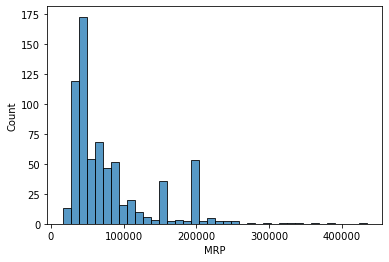

In [61]:
sns.histplot(df['MRP'])
plt.show()

<AxesSubplot:>

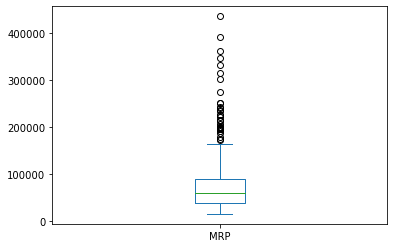

In [62]:
df['MRP'].plot(kind = 'box')

##### ANALYSING THE MRP FEATURE: 5-point summary

In [63]:
df['MRP'].mean()

80513.64326647564

In [64]:
df['MRP'].median()

59890.0

In [65]:
df['MRP'].min()

15990.0

In [66]:
df['MRP'].max()

434830.0

In [67]:
df['MRP'].std()

59891.91392736255

##### Treating the Outliers:

In [68]:
print(df['MRP'].quantile(0.25))

print(df['MRP'].quantile(0.75))

39990.0
89990.0


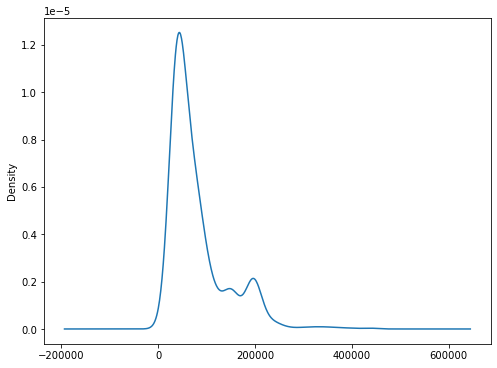

In [69]:
df.MRP.plot(kind='kde', figsize=(8,6))
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


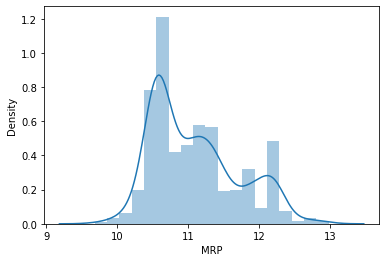

In [70]:
log = df.MRP.apply(np.log1p)
sns.distplot(log)
plt.show()

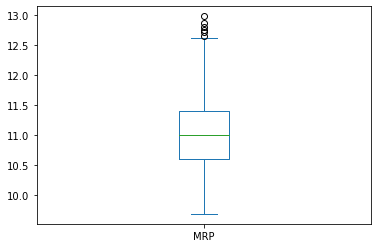

In [71]:
# # clean_df = df[df.MRP <= 400000]
# clean_df['MRP'].plot(kind = 'box')
log.plot(kind='box')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


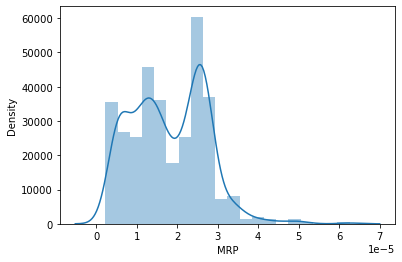

In [72]:
reci = df.MRP.apply(np.reciprocal)
sns.distplot(reci)
plt.show()

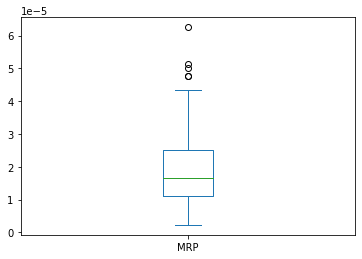

In [73]:
reci.plot(kind='box')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


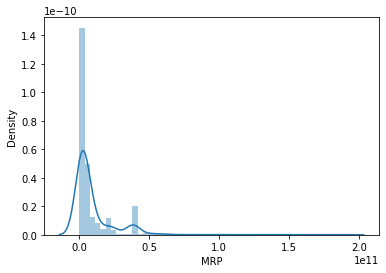

In [74]:
squ = df.MRP.apply(np.square)
sns.distplot(squ)
plt.show()


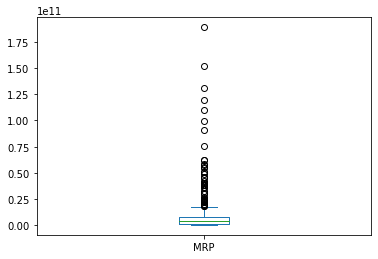

In [75]:
squ.plot(kind='box')
plt.show()

In [76]:
df['MRP'] = log

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


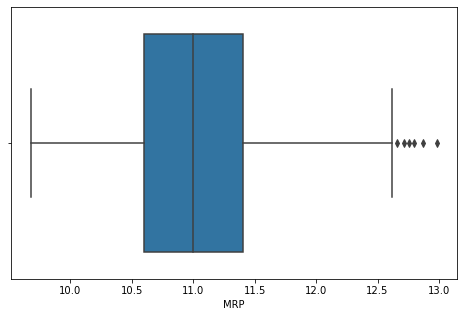

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(df.MRP)
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


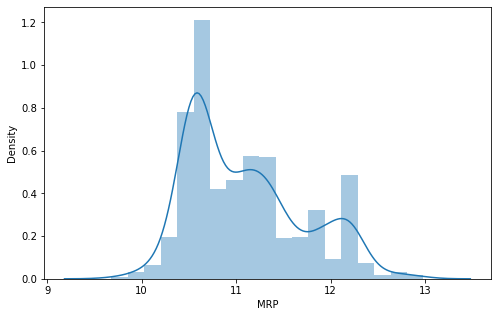

In [78]:
plt.figure(figsize=(8,5))
sns.distplot(df.MRP)
plt.show()

<AxesSubplot:>

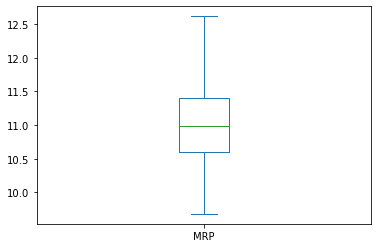

In [79]:
# 1.5 * IQR 

q1 = df['MRP'].quantile(0.25)
q3 = df['MRP'].quantile(0.75)

IQR = q3 - q1

mrp_lower_bound = q1 - 1.5 * IQR
mrp_upper_bound = q3 + 1.5 * IQR

clean_df_2 = df[(df['MRP'] >= mrp_lower_bound) & (df['MRP'] <= mrp_upper_bound)]

clean_df_2['MRP'].plot(kind='box')

<AxesSubplot:xlabel='MRP', ylabel='Density'>

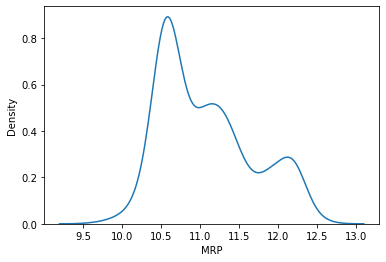

In [80]:
sns.kdeplot(clean_df_2['MRP'])

<AxesSubplot:xlabel='Brand', ylabel='MRP'>

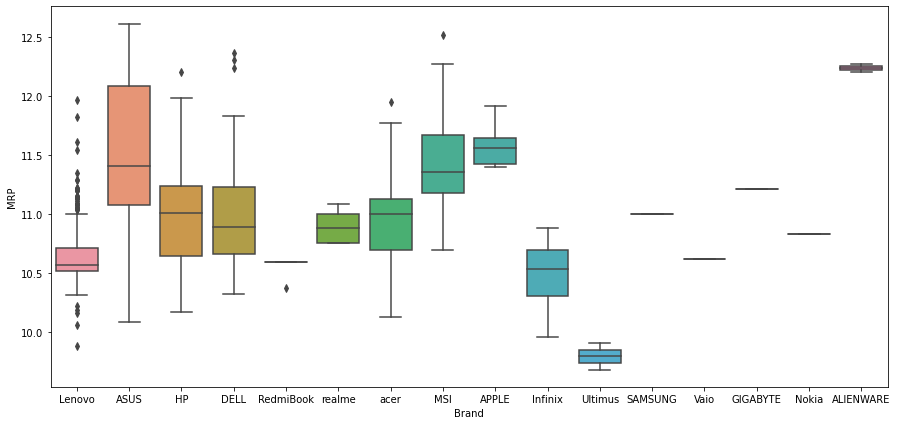

In [81]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df.Brand, y = clean_df_2.MRP)

##### DATA VISUALIZATION:

<AxesSubplot:xlabel='Brand', ylabel='count'>

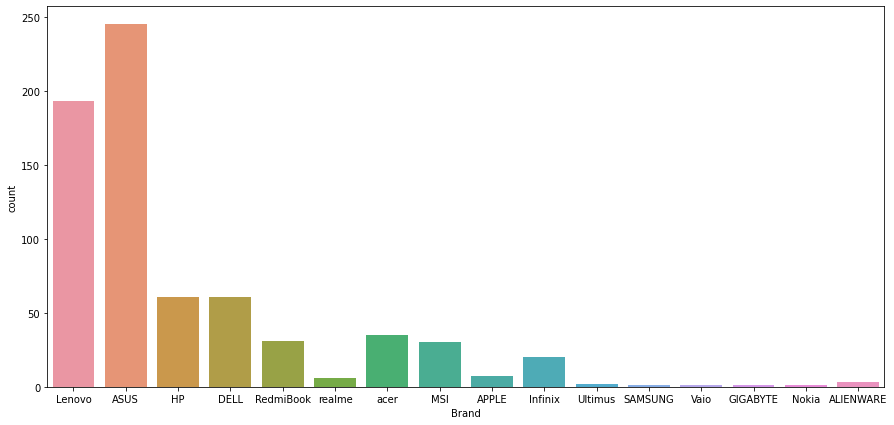

In [82]:
plt.figure(figsize=(15, 7))
sns.countplot(x=df.Brand)

In [83]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                      
                 min        max       mean
Brand                                     
ALIENWARE  12.206028  12.752432  12.411960
APPLE      11.396291  11.918331  11.575958
ASUS       10.085434  12.799375  11.508401
DELL       10.323151  12.982713  11.032823
GIGABYTE   11.211699  11.211699  11.211699
HP         10.165506  12.206028  10.990843
Infinix     9.951849  10.877877  10.479615
Lenovo      9.877708  11.970293  10.679256
MSI        10.691740  12.873879  11.541262
Nokia      10.829550  10.829550  10.829550
RedmiBook  10.373210  10.596410  10.589210
SAMSUNG    11.001950  11.001950  11.001950
Ultimus     9.679781   9.903037   9.791409
Vaio       10.621108  10.621108  10.621108
acer       10.126271  11.954343  10.968831
realme     10.757711  11.082143  10.893196

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Lenovo'),
  Text(1, 0, 'ASUS'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'DELL'),
  Text(4, 0, 'RedmiBook'),
  Text(5, 0, 'realme'),
  Text(6, 0, 'acer'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'APPLE'),
  Text(9, 0, 'Infinix'),
  Text(10, 0, 'Ultimus'),
  Text(11, 0, 'SAMSUNG'),
  Text(12, 0, 'Vaio'),
  Text(13, 0, 'GIGABYTE'),
  Text(14, 0, 'Nokia'),
  Text(15, 0, 'ALIENWARE')])

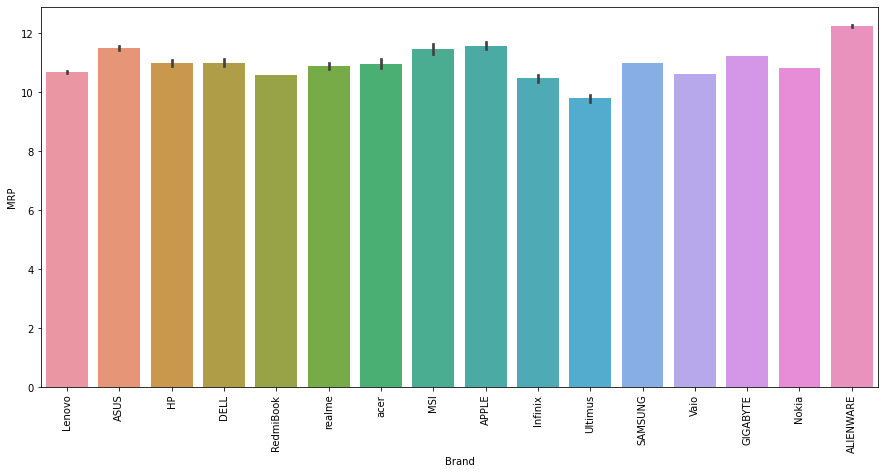

In [84]:
plt.figure(figsize=(15, 7))
sns.barplot(x = df['Brand'],y = clean_df_2['MRP'])
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Brand'>

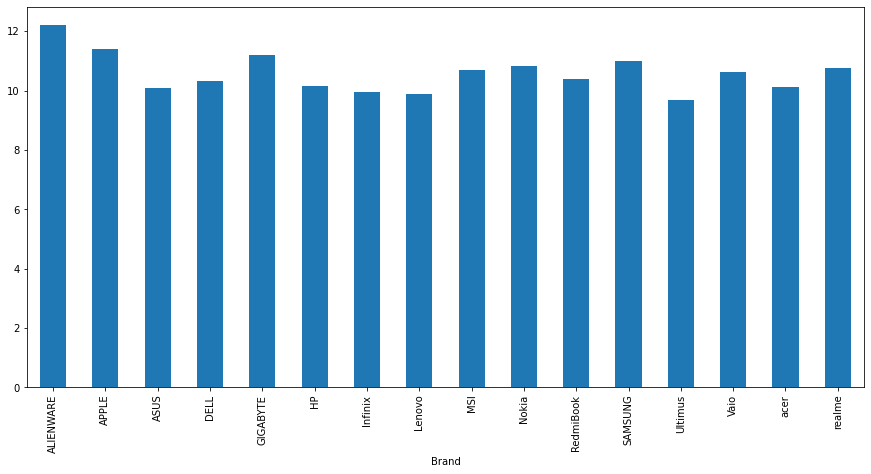

In [85]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')

In [86]:
df['Processor'].value_counts().head()

Intel Core i5 Processor            150
Intel Core i3 Processor            129
AMD Ryzen 9 Octa Core Processor     87
AMD Ryzen 7 Octa Core Processor     79
Intel Core i7 Processor             49
Name: Processor, dtype: int64

In [87]:
df['ProcessorName'] = df['Processor'].apply(lambda x:" ".join(x.split()[0:3]))

In [88]:
df.head()

,Product,MRP,Feature,Processor,RAM,RAMType,OS,Storage,Brand,ScreenSize,ProcessorName
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,256 GB SSD,Lenovo,14.0,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,Lenovo,15.6,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,ASUS,15.6,Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,DDR4,Windows,512 GB SSD,HP,15.6,AMD Ryzen 5
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,DDR4,Windows,512 GB SSD,ASUS,15.6,Intel Core i5


In [89]:
def fetch_processor(text):
    if text == 'Intel Core i7' or 'Intel Core i5' or 'Intel Core i3':
        return text
    else:
        if text.split([0]) == 'Intel':
            return 'other Intel Processor'
        else:
            return 'AMD Processor'

In [90]:
df['ProcessorName'] = df['Processor'].apply(fetch_processor)

<AxesSubplot:>

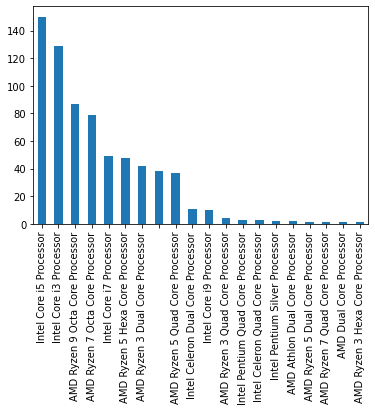

In [91]:
df['ProcessorName'].value_counts().plot(kind = 'bar')

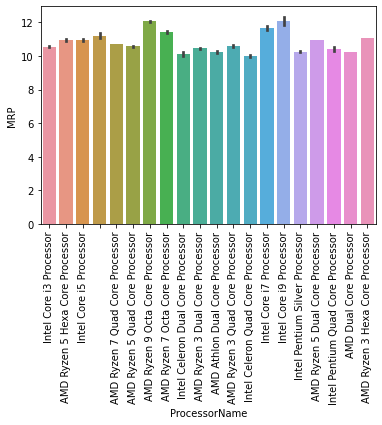

In [92]:
sns.barplot(x = df['ProcessorName'],y = clean_df_2['MRP'])
plt.xticks(rotation = 90)
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 719
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        698 non-null    object 
 1   MRP            698 non-null    float64
 2   Feature        698 non-null    object 
 3   Processor      698 non-null    object 
 4   RAM            698 non-null    int32  
 5   RAMType        698 non-null    object 
 6   OS             698 non-null    object 
 7   Storage        698 non-null    object 
 8   Brand          698 non-null    object 
 9   ScreenSize     698 non-null    float64
 10  ProcessorName  698 non-null    object 
dtypes: float64(2), int32(1), object(8)
memory usage: 78.9+ KB


In [94]:
df.drop(df.columns[3],axis = 1)

,Product,MRP,Feature,RAM,RAMType,OS,Storage,Brand,ScreenSize,ProcessorName
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8,DDR4,Windows,256 GB SSD,Lenovo,14.0,Intel Core i3 Processor
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,Lenovo,15.6,Intel Core i3 Processor
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,ASUS,15.6,Intel Core i3 Processor
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,8,DDR4,Windows,512 GB SSD,HP,15.6,AMD Ryzen 5 Hexa Core Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,ASUS,15.6,Intel Core i5 Processor
...,...,...,...,...,...,...,...,...,...,...
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,11.407576,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,16,DDR4,Windows,512 GB SSD,HP,15.6,AMD Ryzen 7 Octa Core Processor
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,11.204918,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,8,DDR4,Windows,512 GB SSD,Lenovo,15.6,AMD Ryzen 7 Octa Core Processor
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,12.180709,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,16,DDR5,Windows,1 TB SSD,ASUS,15.6,AMD Ryzen 9 Octa Core Processor
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,11.743966,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,16,DDR5,Windows,512 GB SSD,ASUS,14.0,Intel Core i7 Processor


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 719
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        698 non-null    object 
 1   MRP            698 non-null    float64
 2   Feature        698 non-null    object 
 3   Processor      698 non-null    object 
 4   RAM            698 non-null    int32  
 5   RAMType        698 non-null    object 
 6   OS             698 non-null    object 
 7   Storage        698 non-null    object 
 8   Brand          698 non-null    object 
 9   ScreenSize     698 non-null    float64
 10  ProcessorName  698 non-null    object 
dtypes: float64(2), int32(1), object(8)
memory usage: 78.9+ KB


In [96]:
df1 = df.drop(df.columns[8],axis = 1)

In [97]:
df1

,Product,MRP,Feature,Processor,RAM,RAMType,OS,Storage,ScreenSize,ProcessorName
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,256 GB SSD,14.0,Intel Core i3 Processor
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i3 Processor
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i3 Processor
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 5 Hexa Core Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i5 Processor
...,...,...,...,...,...,...,...,...,...,...
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,11.407576,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,AMD Ryzen 7 Octa Core Processor,16,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 7 Octa Core Processor
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,11.204918,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 7 Octa Core Processor
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,12.180709,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16,DDR5,Windows,1 TB SSD,15.6,AMD Ryzen 9 Octa Core Processor
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,11.743966,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16,DDR5,Windows,512 GB SSD,14.0,Intel Core i7 Processor


In [98]:
final = df1.drop(df1.columns[3],axis = 1)

In [99]:
final

,Product,MRP,Feature,RAM,RAMType,OS,Storage,ScreenSize,ProcessorName
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8,DDR4,Windows,256 GB SSD,14.0,Intel Core i3 Processor
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i3 Processor
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i3 Processor
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,8,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 5 Hexa Core Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i5 Processor
...,...,...,...,...,...,...,...,...,...
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,11.407576,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,16,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 7 Octa Core Processor
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,11.204918,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,8,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 7 Octa Core Processor
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,12.180709,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,16,DDR5,Windows,1 TB SSD,15.6,AMD Ryzen 9 Octa Core Processor
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,11.743966,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,16,DDR5,Windows,512 GB SSD,14.0,Intel Core i7 Processor


In [100]:
final.columns

Index(['Product', 'MRP', 'Feature', 'RAM', 'RAMType', 'OS', 'Storage',
       'ScreenSize', 'ProcessorName'],
      dtype='object')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MRP', ylabel='Density'>

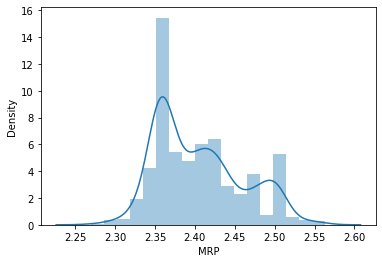

In [101]:
sns.distplot(np.log(df['MRP']))

<AxesSubplot:ylabel='Density'>

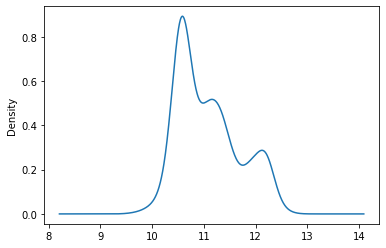

In [102]:
clean_df_2['MRP'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

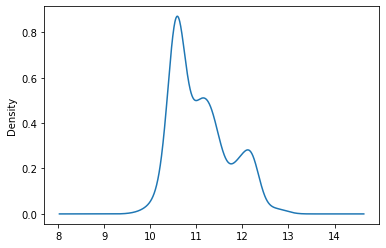

In [103]:
df['MRP'].plot(kind = 'kde')

###### DATA PREPARATION:

In [104]:
#pip uninstall scikit-learn


In [105]:
#pip install -U scikit-learn

In [106]:
import sklearn

print(sklearn.__version__)

1.2.2


In [107]:
final.columns

Index(['Product', 'MRP', 'Feature', 'RAM', 'RAMType', 'OS', 'Storage',
       'ScreenSize', 'ProcessorName'],
      dtype='object')

In [108]:
y = final['MRP']
X = final[['Product','Feature','RAM','RAMType','OS','Storage','ScreenSize','ProcessorName']]

In [109]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [110]:
X_train.head()

,Product,Feature,RAM,RAMType,OS,Storage,ScreenSize,ProcessorName
421,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAMW...,16,DDR4,Windows,1 TB SSD,15.6,AMD Ryzen 7 Octa Core Processor
441,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,16,DDR5,Windows,1 TB SSD,15.6,AMD Ryzen 9 Octa Core Processor
255,acer Aspire Vero(Green PC ) Core i5 11th Gen -...,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i5 Processor
487,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,8,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 5 Quad Core Processor
235,ASUS EeeBook 14 with NumberPad Pentium Silver ...,Intel Pentium Silver Processor8 GB DDR4 RAM64 ...,8,DDR4,Windows,256 GB SSD,15.6,Intel Pentium Silver Processor


In [152]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

ValueError: all features must be in [0, 7] or [-8, 0]

In [111]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(488, 8) (488,)
(210, 8) (210,)


##### b. Separating Categorical and Numerical Columns:

In [112]:
X_train.head()

,Product,Feature,RAM,RAMType,OS,Storage,ScreenSize,ProcessorName
421,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAMW...,16,DDR4,Windows,1 TB SSD,15.6,AMD Ryzen 7 Octa Core Processor
441,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,16,DDR5,Windows,1 TB SSD,15.6,AMD Ryzen 9 Octa Core Processor
255,acer Aspire Vero(Green PC ) Core i5 11th Gen -...,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i5 Processor
487,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,8,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 5 Quad Core Processor
235,ASUS EeeBook 14 with NumberPad Pentium Silver ...,Intel Pentium Silver Processor8 GB DDR4 RAM64 ...,8,DDR4,Windows,256 GB SSD,15.6,Intel Pentium Silver Processor


In [113]:
X_train.dtypes

Product           object
Feature           object
RAM                int32
RAMType           object
OS                object
Storage           object
ScreenSize       float64
ProcessorName     object
dtype: object

In [114]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,Product,Feature,RAMType,OS,Storage,ProcessorName
421,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAMW...,DDR4,Windows,1 TB SSD,AMD Ryzen 7 Octa Core Processor
441,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,DDR5,Windows,1 TB SSD,AMD Ryzen 9 Octa Core Processor
255,acer Aspire Vero(Green PC ) Core i5 11th Gen -...,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,DDR4,Windows,512 GB SSD,Intel Core i5 Processor
487,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,DDR4,Windows,512 GB SSD,AMD Ryzen 5 Quad Core Processor
235,ASUS EeeBook 14 with NumberPad Pentium Silver ...,Intel Pentium Silver Processor8 GB DDR4 RAM64 ...,DDR4,Windows,256 GB SSD,Intel Pentium Silver Processor


In [115]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,ScreenSize
421,15.6
441,15.6
255,15.6
487,15.6
235,15.6


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor

##### c. Scaling the Numerical Features

In [118]:
X_train_num.head()

,ScreenSize
421,15.6
441,15.6
255,15.6
487,15.6
235,15.6


In [119]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,ScreenSize
421,0.465787
441,0.465787
255,0.465787
487,0.465787
235,0.465787


In [120]:
X_train_num.describe()

,ScreenSize
count,488.000000
mean,15.314754
std,0.613024
min,14.000000
25%,15.600000
50%,15.600000
75%,15.600000
max,15.600000


In [121]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [15.3147541]
Std of each column: [0.61239548]


##### d. Applying OneHotEncoding on Categorical Columns

In [122]:
X_train_cat['Product'].value_counts(normalize=True)


Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop          0.049180
ASUS ROG Strix G15 (2022) with 90Whr Battery Ryzen 9 Octa Core 6900HX - (16 GB/1 TB SSD/Windows 11 Hom...    0.045082
Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...    0.043033
RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop                     0.043033
ASUS ROG Strix G15 Advantage Edition with 90Whr Battery Ryzen 9 Octa Core 5980HX - (16 GB/1 TB SSD/Win...    0.040984
                                                                                                               ...   
Lenovo Core i5 11th Gen - (16 GB/512 GB SSD/Windows 10 Home) 15ITL05 Thin and Light Laptop                   0.002049
ASUS ROG Zephyrus M16 (2022) with 90Whr Battery Core i7 12th Gen - (16 GB/1 TB SSD/Windows 11 Home/6 G...    0.002049
ASUS Ryzen 5 Hexa Core - (8 GB/1 TB HDD/256 GB SSD/Windo

In [123]:
X_train_cat['Feature'].value_counts(normalize=True)


Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty                                      0.049180
AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMWindows 11 Operating System1 TB SSD39.62 cm (15.6 inch) DisplayMicrosoft Office Home & Student1 Year Onsite Warranty                                            0.045082
Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty                                    0.043033
Intel Core i5 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayMS Office Home & Student 2019, Mi Smart Share, DTS Audio processing1 Year Onsite Warranty    0.043033
AMD Ryzen 9 Octa Core Processor16 GB DDR4 RAMWindows 11 Operating System1 TB SSD39.62 cm (15.6 inch) DisplayMicrosoft Office Home & Student1 Yea

In [124]:
X_train_cat['RAMType'].value_counts(normalize=True)


DDR4            0.848361
DDR5            0.135246
DDR4DDR4        0.010246
DDR4DDR6DDR4    0.004098
DDR4DDR5DDR4    0.002049
Name: RAMType, dtype: float64

In [125]:
X_train_cat['OS'].value_counts(normalize=True)


Windows    0.987705
Mac        0.010246
Others     0.002049
Name: OS, dtype: float64

In [126]:
X_train_cat['Storage'].value_counts(normalize=True)


512 GB SSD            0.526639
1 TB SSD              0.233607
256 GB SSD            0.157787
1 TB HDD256 GB SSD    0.036885
1 TB HDD              0.022541
128 GB SSD            0.010246
2 TB SSD              0.010246
1 TB HDD512 GB SSD    0.002049
Name: Storage, dtype: float64

In [127]:
X_train_cat['ProcessorName'].value_counts(normalize=True)


Intel Core i5 Processor              0.223361
Intel Core i3 Processor              0.202869
AMD Ryzen 9 Octa Core Processor      0.129098
AMD Ryzen 7 Octa Core Processor      0.102459
AMD Ryzen 5 Hexa Core Processor      0.069672
Intel Core i7 Processor              0.067623
AMD Ryzen 3 Dual Core Processor      0.057377
                                     0.051230
AMD Ryzen 5 Quad Core Processor      0.043033
Intel Celeron Dual Core Processor    0.014344
Intel Core i9 Processor              0.008197
Intel Celeron Quad Core Processor    0.006148
Intel Pentium Quad Core Processor    0.006148
AMD Athlon Dual Core Processor       0.004098
AMD Ryzen 3 Quad Core Processor      0.004098
Intel Pentium Silver Processor       0.004098
AMD Ryzen 3 Hexa Core Processor      0.002049
AMD Dual Core Processor              0.002049
AMD Ryzen 5 Dual Core Processor      0.002049
Name: ProcessorName, dtype: float64

In [128]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


""
421
441
255
487
235


In [129]:
encoder_.categories_

[array(['ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 2060/300...',
        'ALIENWARE Core i9 10th Gen - (32 GB/1 TB SSD/Windows 10 Home/8 GB Graphics/NVIDIA GeForce RTX 2080 wit...',
        'APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A',
        'APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN93HN/A',
        'APPLE 2020 Macbook Air M1 - (8 GB/512 GB SSD/Mac OS Big Sur) MGNE3HN/A',
        'APPLE MacBook Air M1 - (16 GB/512 GB SSD/Mac OS Big Sur) Z124J006KD',
        'APPLE MacBook Pro M1 - (8 GB/1 TB SSD/Mac OS Big Sur) Z11B0008S',
        'ASUS (2022) Celeron Dual Core - (4 GB/128 GB SSD/Windows 11 Home) BR1100FKA-BP1104W Laptop',
        'ASUS ASUS TUF Dash Core i5 11th Gen - (16 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce R...',
        'ASUS Core i3 11th Gen - (4 GB/256 GB SSD/Windows 11 Home) X415EA-EK302WS Thin and Light Laptop',
        'ASUS Core i3 11th Gen - (8 GB/25

In [130]:
encoder_.infrequent_categories_

[array(['ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 2060/300...',
        'ALIENWARE Core i9 10th Gen - (32 GB/1 TB SSD/Windows 10 Home/8 GB Graphics/NVIDIA GeForce RTX 2080 wit...',
        'APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A',
        'APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN93HN/A',
        'APPLE 2020 Macbook Air M1 - (8 GB/512 GB SSD/Mac OS Big Sur) MGNE3HN/A',
        'APPLE MacBook Air M1 - (16 GB/512 GB SSD/Mac OS Big Sur) Z124J006KD',
        'APPLE MacBook Pro M1 - (8 GB/1 TB SSD/Mac OS Big Sur) Z11B0008S',
        'ASUS (2022) Celeron Dual Core - (4 GB/128 GB SSD/Windows 11 Home) BR1100FKA-BP1104W Laptop',
        'ASUS ASUS TUF Dash Core i5 11th Gen - (16 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce R...',
        'ASUS Core i3 11th Gen - (4 GB/256 GB SSD/Windows 11 Home) X415EA-EK302WS Thin and Light Laptop',
        'ASUS Core i3 11th Gen - (8 GB/25

In [131]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Product_ALIENWARE Core i9 10th Gen - (32 GB/1 TB SSD/Windows 10 Home/8 GB Graphics/NVIDIA GeForce RTX 2080 wit...,Product_APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A,Product_APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN93HN/A,Product_APPLE 2020 Macbook Air M1 - (8 GB/512 GB SSD/Mac OS Big Sur) MGNE3HN/A,Product_APPLE MacBook Air M1 - (16 GB/512 GB SSD/Mac OS Big Sur) Z124J006KD,Product_APPLE MacBook Pro M1 - (8 GB/1 TB SSD/Mac OS Big Sur) Z11B0008S,Product_ASUS (2022) Celeron Dual Core - (4 GB/128 GB SSD/Windows 11 Home) BR1100FKA-BP1104W Laptop,Product_ASUS ASUS TUF Dash Core i5 11th Gen - (16 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce R...,Product_ASUS Core i3 11th Gen - (4 GB/256 GB SSD/Windows 11 Home) X415EA-EK302WS Thin and Light Laptop,Product_ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) X515EA-BR312TS Thin and Light Laptop,...,ProcessorName_AMD Ryzen 7 Octa Core Processor,ProcessorName_AMD Ryzen 9 Octa Core Processor,ProcessorName_Intel Celeron Dual Core Processor,ProcessorName_Intel Celeron Quad Core Processor,ProcessorName_Intel Core i3 Processor,ProcessorName_Intel Core i5 Processor,ProcessorName_Intel Core i7 Processor,ProcessorName_Intel Core i9 Processor,ProcessorName_Intel Pentium Quad Core Processor,ProcessorName_Intel Pentium Silver Processor
421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### e.Applying Label Encoding on Categorical Columns

In [132]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()


""
421
441
255
487
235


In [133]:
X_train_cat.RAMType.unique()

array(['DDR4', 'DDR5', 'DDR4DDR4', 'DDR4DDR5DDR4', 'DDR4DDR6DDR4'],
      dtype=object)

In [134]:
RAMType_encoder = {'DDR3' : 1,'DDR4' : 2,'DDR5' : 3,'DDR4DDR4' : 4, 'DDR4DDR5DDR4' : 5, 'DDR4DDR6DDR4' : 6}
X_train_cat_le['RAMType'] = X_train_cat['RAMType'].apply(lambda x : RAMType_encoder[x])

X_train_cat_le.head()

,RAMType
421,2
441,3
255,2
487,2
235,2


In [135]:
X_train_cat.OS.unique()

array(['Windows', 'Others', 'Mac'], dtype=object)

In [136]:
OS_encoder = {'Windows' : 1,'Mac' : 2,'Others' : 3}
X_train_cat_le['OS'] = X_train_cat['OS'].apply(lambda x : OS_encoder[x])

X_train_cat_le.head()

,RAMType,OS
421,2,1
441,3,1
255,2,1
487,2,1
235,2,1


In [137]:
X_train_cat.Storage.unique()

array(['1 TB SSD', '512 GB SSD', '256 GB SSD', '1 TB HDD', '128 GB SSD',
       '1 TB HDD256 GB SSD', '2 TB SSD', '1 TB HDD512 GB SSD'],
      dtype=object)

In [138]:
Storage_encoder = {'128 GB SSD' : 1,'256 GB SSD' : 2,'512 GB SSD' : 3,'1 TB SSD' : 4,'1 TB HDD' : 5,'2 TB SSD' : 6,'1 TB HDD256 GB SSD' : 7,'1 TB HDD512 GB SSD' : 8,'256 GB HDD256 GB SSD' : 9,'128 GB SSD1 TB HDD128 GB SSD' : 10}
X_train_cat_le['Storage'] = X_train_cat['Storage'].apply(lambda x : Storage_encoder[x])

X_train_cat_le.head()

,RAMType,OS,Storage
421,2,1,4
441,3,1,4
255,2,1,3
487,2,1,3
235,2,1,2


##### f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [139]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,ScreenSize,RAMType,OS,Storage
421,0.465787,2,1,4
441,0.465787,3,1,4
255,0.465787,2,1,3
487,0.465787,2,1,3
235,0.465787,2,1,2


##### g. Preparing Test Data

In [140]:
X_test.head()

,Product,Feature,RAM,RAMType,OS,Storage,ScreenSize,ProcessorName
400,HP 14s Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,8,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 5 Hexa Core Processor
334,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,Intel Core i5 Processor (9th Gen)8 GB DDR4 RAM...,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i5 Processor
238,DELL Inspiron Ryzen 3 Dual Core 3250U - (8 GB/...,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...,8,DDR4,Windows,512 GB SSD,15.6,AMD Ryzen 3 Dual Core Processor
437,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i3 Processor
411,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8,DDR4,Windows,512 GB SSD,15.6,Intel Core i3 Processor


In [141]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 400 to 673
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        210 non-null    object 
 1   Feature        210 non-null    object 
 2   RAM            210 non-null    int32  
 3   RAMType        210 non-null    object 
 4   OS             210 non-null    object 
 5   Storage        210 non-null    object 
 6   ScreenSize     210 non-null    float64
 7   ProcessorName  210 non-null    object 
dtypes: float64(1), int32(1), object(6)
memory usage: 13.9+ KB


In [142]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,Product,Feature,RAMType,OS,Storage,ProcessorName
400,HP 14s Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,DDR4,Windows,512 GB SSD,AMD Ryzen 5 Hexa Core Processor
334,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,Intel Core i5 Processor (9th Gen)8 GB DDR4 RAM...,DDR4,Windows,512 GB SSD,Intel Core i5 Processor
238,DELL Inspiron Ryzen 3 Dual Core 3250U - (8 GB/...,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...,DDR4,Windows,512 GB SSD,AMD Ryzen 3 Dual Core Processor
437,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,DDR4,Windows,512 GB SSD,Intel Core i3 Processor
411,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,DDR4,Windows,512 GB SSD,Intel Core i3 Processor


In [143]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,ScreenSize
400,15.6
334,15.6
238,15.6
437,15.6
411,15.6


In [144]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,ScreenSize
400,0.465787
334,0.465787
238,0.465787
437,0.465787
411,0.465787


In [145]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
400
334
238
437
411


In [146]:
X_test_cat_le['RAMType'] = X_test_cat['RAMType'].apply(lambda x : RAMType_encoder[x])

X_test_cat_le['OS'] = X_test_cat['OS'].apply(lambda x : OS_encoder[x])

X_test_cat_le['Storage'] = X_test_cat['Storage'].apply(lambda x : Storage_encoder[x])

X_test_cat_le.head()

,RAMType,OS,Storage
400,2,1,3
334,2,1,3
238,2,1,3
437,2,1,3
411,2,1,3


In [147]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,ScreenSize,RAMType,OS,Storage
400,0.465787,2,1,3
334,0.465787,2,1,3
238,0.465787,2,1,3
437,0.465787,2,1,3
411,0.465787,2,1,3


#### Linear Regression

In [148]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [155]:
y_test_pred = regressor.predict(X_test_transformed)

In [156]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
400,10.868397,10.951413
334,10.976782,10.951413
238,10.601398,10.951413
437,10.596410,10.951413
411,10.596410,10.951413


<AxesSubplot:xlabel='MRP', ylabel='Count'>

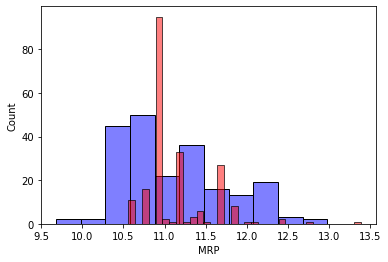

In [157]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [176]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print( 'R2 Error: ', metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  0.2772937997453458
Mean Squared Error:  0.150798910868854
Root Mean Squared Error:  0.3883283544487242
R2 Error:  0.6096707409302164


##### KNN Regressor

In [165]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)


KNeighborsRegressor()

In [166]:
y_test_pred = regressor.predict(X_test_transformed)

In [167]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
400,10.868397,10.87231
334,10.976782,10.87231
238,10.601398,10.87231
437,10.596410,10.87231
411,10.596410,10.87231


<AxesSubplot:xlabel='MRP', ylabel='Count'>

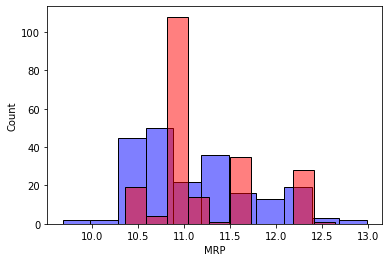

In [168]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [175]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print( 'R2 Error: ', metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  0.2772937997453458
Mean Squared Error:  0.150798910868854
Root Mean Squared Error:  0.3883283544487242
R2 Error:  0.6096707409302164


##### DecisionTree Regression

In [170]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)


DecisionTreeRegressor()

In [171]:
y_test_pred = regressor.predict(X_test_transformed)

In [172]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
400,10.868397,10.836021
334,10.976782,10.836021
238,10.601398,10.836021
437,10.596410,10.836021
411,10.596410,10.836021


<AxesSubplot:xlabel='MRP', ylabel='Count'>

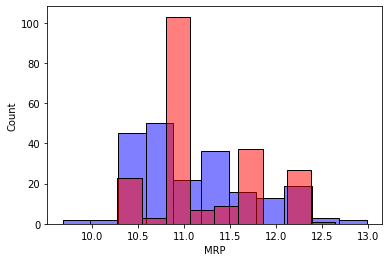

In [173]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [174]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print( 'R2 Error: ', metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  0.2772937997453458
Mean Squared Error:  0.150798910868854
Root Mean Squared Error:  0.3883283544487242
R2 Error:  0.6096707409302164


##### Random Forest Regression

In [159]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [160]:
y_test_pred = regressor.predict(X_test_transformed)

In [161]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
400,10.868397,10.839021
334,10.976782,10.839021
238,10.601398,10.839021
437,10.596410,10.839021
411,10.596410,10.839021


<AxesSubplot:xlabel='MRP', ylabel='Count'>

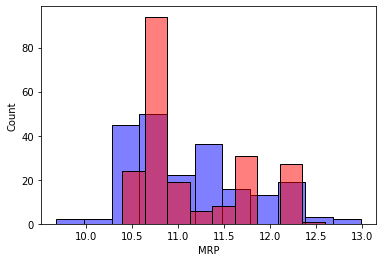

In [162]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [163]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print( 'R2 Error: ', metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  0.2721693453114692
Mean Squared Error:  0.1290339815937559
Root Mean Squared Error:  0.3592130030967085
R2 Error:  0.6660072798926471
